<a id="1"></a> <br>
# Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.express as px


df = pd.read_csv("../input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


<a id="2"></a> <br>

# Data preparation for EDA

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [3]:
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}


In [4]:
df['country'] = df['country'].astype("string")
df["country"] = df["country"].map(country_map)


In [5]:
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
df["page 1 (main category)"] = df["page 1 (main category)"].map(page1_map)


In [6]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

df["location"] = df["location"].map(location_map)


In [7]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

df["colour"] = df["colour"].map(color_map)


In [8]:
model_map = {
    1: "En face",
    2: "Profile"}

df["model photography"] = df["model photography"].map(model_map)


In [9]:
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

df["month"] = df["month"].map(month_map)

'''df['product price status'] = df['price 2'].map({
    1: 'more than average',
    2: 'less than average'
}).astype('category')'''

"df['product price status'] = df['price 2'].map({\n    1: 'more than average',\n    2: 'less than average'\n}).astype('category')"

# Missing Data

In [10]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

Great, No missing values

## Duplicates 

In [11]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


No duplicate rows

# Remove useless columns

In [12]:
df.drop('session ID', axis=1, inplace=True)

# Outliers

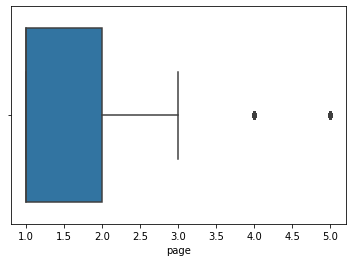

In [13]:
column_list = ["page"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

After inspecting the outliers, It seems to be important data 

<a id="3"></a> <br>

# EDA

## Which country has the most  website visitors?

In [14]:
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show()

It seems that Poland and Czech Republic are the countries that have most visitors

## Flexibility in buying products for each country 

In [15]:
df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")


In [16]:
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show()


**Countries like Romani and Estonia have high flexibility (It`s Great) and countries like Greece and Croatia have low flexibility. I think there are things that affect it like**:
- Different language that they use 
- stranger products that they searched 
- They was browsing only (viewing products)
- Hardly getting their products (We will discuss this problem later)

## Relationship between months and buying from the website

In [17]:
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()
from plotly.subplots import make_subplots
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]],subplot_titles = [
                        'With August',
                        'Without August'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()

As we can see April and May is the most selling months and June is the lowest selling month 

The data for August is incomplete. it stops at day 13 only

In [18]:
df[df['month'] == 'August']['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

# Does users seek cheaper products ?

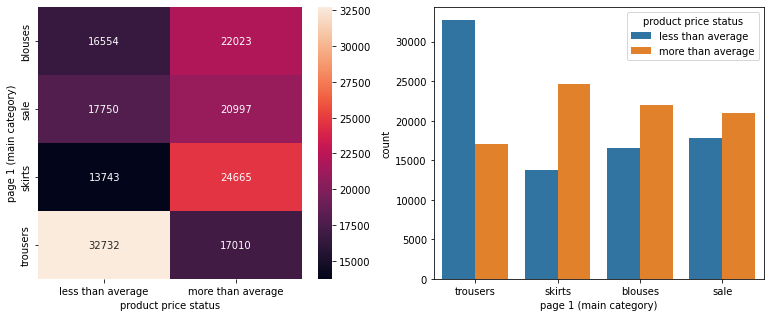

In [19]:
df_copy=df.copy()
df_copy['product price status'] = df_copy['price 2'].map({
    1: 'more than average',
    2: 'less than average'
}).astype('category')

plt.figure(figsize= (13, 5))
#LEFT plot: Heatmap
plt.subplot(1, 2, 1)
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_copy.groupby(['page 1 (main category)', 'product price status']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have page 1 (main category) names class on rows
ct_counts = ct_counts.pivot(index = 'page 1 (main category)', columns = 'product price status', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')
# RIGHT plot: Clustered box plot
plt.subplot(1, 2, 2)
sns.countplot(data = df_copy, x = 'page 1 (main category)', hue = 'product price status')
plt.show()

In contrast to other products where users don't care about price, users typically seek out more affordable trousers.

## Are more clicks on the website refer to higher profit ? and is the main category related?


In [20]:
df11 = df.groupby(by=["order",'page 1 (main category)'])[["price"]].sum().reset_index()
fig = px.scatter(df11, x="order", y="price",color=df11['page 1 (main category)'])
fig.show()

The answer for our question is NO because clicks higher than 100 are not highly selling.Generally trousers are most selling for most orders and then blouses

## What is the best selling category?

In [21]:
df_1 = df.groupby("page 1 (main category)")[["price"]].count()
df_2 = df.groupby("page 1 (main category)")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]], 
                    subplot_titles = [
                        'Total items per Type',
                        'Total sales in dollars per Type'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()


It seems that trousers are prefered buying but our categories is fairly distributed 

## What does customers buy from each page?

In [22]:
df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="page 1 (main category)", barmode="group")

- The first page is the best for selling specially for trousers and skirts categories 
- It seems also that last page is preferred for sale products

we can also conclude that:
- In page 1, The trousers are better than the other products
- In page 2, The skirts are better than the other products
- In page 3, The blouses are better than the other products
- Finnaly in page 4 and 5, users taget the sales


## What is the most attractable section in page and color of product per type?

In [23]:
df2 = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(df2, x="location", y="counts",
                 color='colour', size='counts', size_max=30)
fig.show()


We can see that:
- First attractable location is **bottom left** specially for **black** color 
- Second attractable location is **top left** specially for **blue** color

## Are selling products affected by colour ?

In [24]:
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)

In [25]:
fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices")
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show()

It seems that selling products is affected by color and we can conclude that:
- **blue** and **black** colors are preferred for customers

## Relation between countries and buying days

In [26]:
sum = df.groupby(by=["country", 'day'])[['price']].sum().reset_index() 
sum = sum.sort_values(['price'], ascending=False)

count = df.groupby(by=["country", 'day'])[['price']].count().reset_index() 
count = count.sort_values(['price'], ascending=False)

sum['avreage_prices'] = sum['price']/count['price']
sum = sum.sort_values(['avreage_prices'], ascending=False)
sum
fig = px.scatter(sum, x=sum["country"], y=sum["day"],color=sum['avreage_prices'],size=sum['avreage_prices'])
fig.show()

For **Switzerlnd**, selling products is **very low** in First of the month and then **increases** throughout the month   

For **Ireland** and **United Kingdom**, selling products **constant** within the days of the month 

## Should we put model photography in the face of the product or in the inside the profile ?

In [27]:
df5 = df.groupby(by=["model photography", 'page 1 (main category)'])[
    'price'].count().reset_index(name="counts")
px.bar(data_frame=df5, x="model photography", y="counts",
       color="page 1 (main category)", barmode="group")

**YES** we should put model photography en face of the products

# Relation between sales , buying days and months

In [28]:
df9 = df[df['page 1 (main category)']== "sale"]
df9 = df.groupby(by=["month","day"])['page 1 (main category)'].count().reset_index(name="counts")


fig = px.scatter(df9, y='month', x="day",
                 size="counts")
fig.show()

### It seems there is no relationship between sales , buying days and months 
- our data is not complete in August

<a id="4"></a> <br>
# Business solutions and recommendations
### Ideas to improve our website :

1. Paying more attention to our prefered countries such as poland and czech republic through thier cultures and ceremonies by offering cultural kinds of products and making high sales in their ceremonies 

2. Attracting medium-buying countries such as Germany and Ireland by sales,coupons,dropshipping,.....

3. Putting best selling products in first and second pages and adding adds to these pages

4. Taking advantage of locations like bottom left with black color and top left with blue color

5. Applying Marketing tools for countries that selling products reduces over a month

6. Prefering model photography in face of the products to inside the profile as much as possible

7. FaaS (Fulfillment as a Service) business, we provide eCommerce businesses from all over the world with Cross-Border Order Fulfillment Services.We can store your products in our warehouses pick & pack them once orders flow in, and ship them with the best, most reliable, fastest or cheapest couriers available per region or country.

8. Full Product and Category Management: Create detailed product pages and organize all your products as you see fit, with robust categorization.

9. Full Suite of Marketing and SEO tools: Use all the best SEO and marketing strategies available today, so you can reach new customers and keep them coming back.

<a id="5"></a> <br>

# Preprocessing

In [29]:
df_copy = pd.read_csv("../input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)
df_copy

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,A13,1,5,1,28,2,1
1,4,1,2,29,1,A16,1,6,1,33,2,1
2,4,1,3,29,2,B4,10,2,1,52,1,1
3,4,1,4,29,2,B17,6,6,2,38,2,1
4,4,1,5,29,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,2,B10,2,4,1,67,1,1
165470,8,13,1,9,1,A11,3,4,1,62,1,1
165471,8,13,1,34,1,A2,3,1,1,43,2,1
165472,8,13,2,34,3,C2,12,1,1,43,1,1


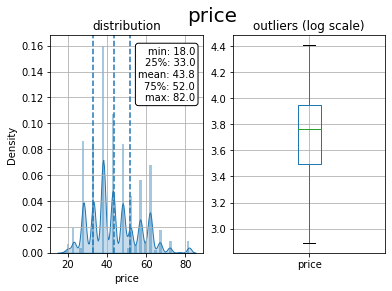

In [30]:
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')


sns.distplot(df_copy[x], hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df_copy[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df_copy[x])
tmp_dtf[x] = np.log(df_copy[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [31]:
df_copy2=df_copy.drop(['price','price 2'],axis=1)

Text(0.5, 1.0, 'pearson correlation')

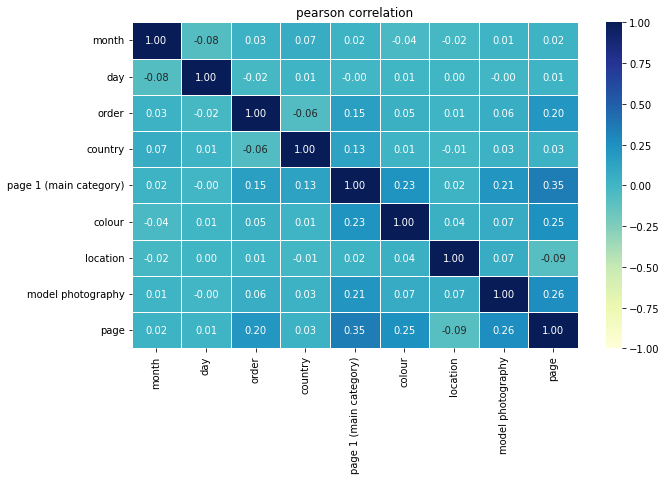

In [32]:
plt.figure(figsize=(10,6))
corr_matrix = df_copy2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [33]:
import numpy as np #Mengolah matrix
import pandas as pd #Read structured data
import matplotlib.pyplot as plt #Data plot visualization
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance

#ensembling
from sklearn.ensemble import VotingClassifier

<a id="6"></a> <br>

# Encoding

In [34]:
df_copy = pd.read_csv("../input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['page 2 (clothing model)']
for x in clm:
    df_copy[x]=le.fit_transform(df_copy[x])

In [35]:
y = df_copy["price"]
X = df_copy.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

<a id="7"></a> <br>

# Feature Engineering

In [36]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

page 2 (clothing model)    2.378073
colour                     0.557006
page 1 (main category)     0.495151
price 2                    0.443521
location                   0.250466
page                       0.166467
model photography          0.065268
order                      0.009678
country                    0.007363
day                        0.007079
month                      0.003580
dtype: float64

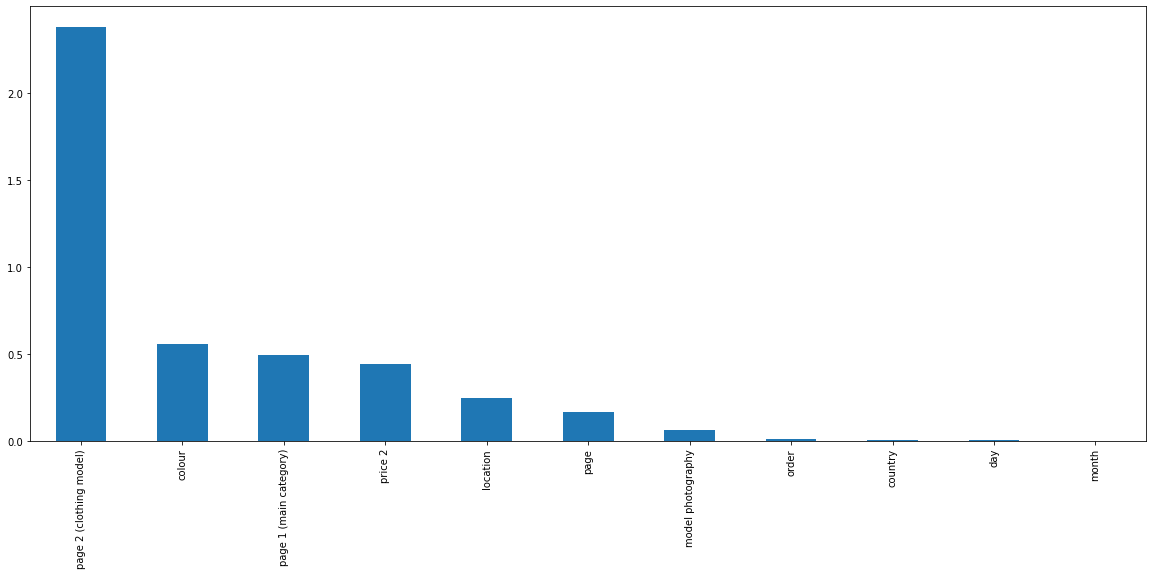

In [37]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [38]:
# I will choose 6 features to select
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'price 2', 'page'],
      dtype='object')

In [39]:
col=['page 1 (main category)', 'page 2 (clothing model)', 'colour','location', 'price 2', 'page']
X_train=X_train[col]
X_test=X_test[col]

# Data Scaling

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="8"></a> <br>

# Regression models
1. Linear regression
2. Ridge regression
3. Lasso regression
4. Random Forest Regressor
5. Gradient Boosting Regressor

# Linear regression

In [41]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

R2=[]
MAPE=[]
MAE=[]
RMSE=[]
acc=[]

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
acc.append(lr_score)
lr_score

0.7833925668844591

In [43]:
## test
predicted = lr.predict(X_test)

In [44]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.78
Mean Absolute Percentage Error: 0.11
Mean Absolute Error: 4
Root Mean Squared Error : 6


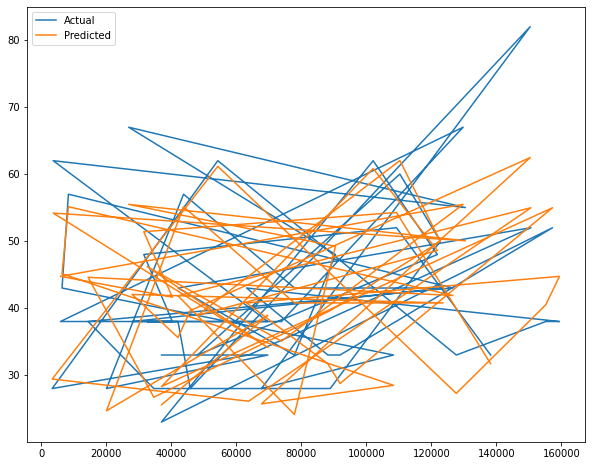

In [45]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

# Ridge regression  

In [46]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [47]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [48]:
## test
predicted = ridge_model.predict(X_test)

r=ridge_model.score(X_train, y_train)
acc.append(r)
r

0.7831289374025826

In [49]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.78
Mean Absolute Percentage Error: 0.11
Mean Absolute Error: 4
Root Mean Squared Error : 6


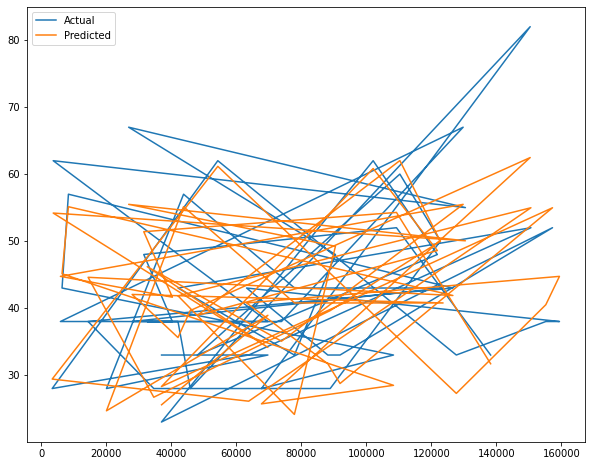

In [50]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

# Lasso regression

In [51]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [52]:
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)
lasso_cv_model

LassoCV(cv=10, max_iter=100000)

In [53]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)
predicted = lasso_tuned.predict(X_test)
l=lasso_tuned.score(X_train, y_train)
acc.append(l)
l

0.7831031908518635

In [54]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.78
Mean Absolute Percentage Error: 0.11
Mean Absolute Error: 4
Root Mean Squared Error : 6


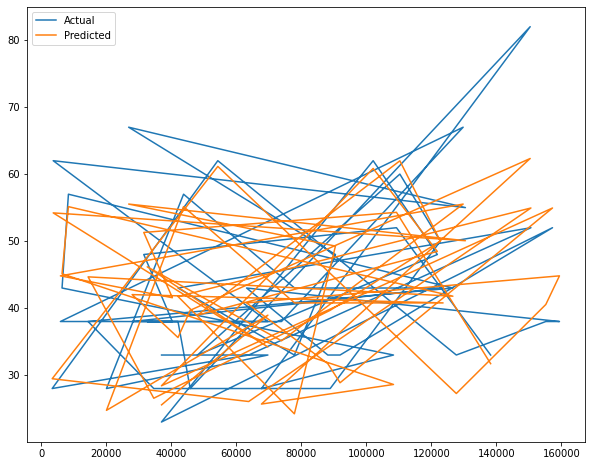

In [55]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score = rfr.score(X_test,y_test)
acc.append(rfr_score)
rfr_score

0.9999999987223803

In [57]:
predicted = rfr.predict(X_test)

In [58]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 1.0
Mean Absolute Percentage Error: 0.0
Mean Absolute Error: 0
Root Mean Squared Error : 0


### An R-squared of 100% means that all movements of a price are completely explained by movements in other variables

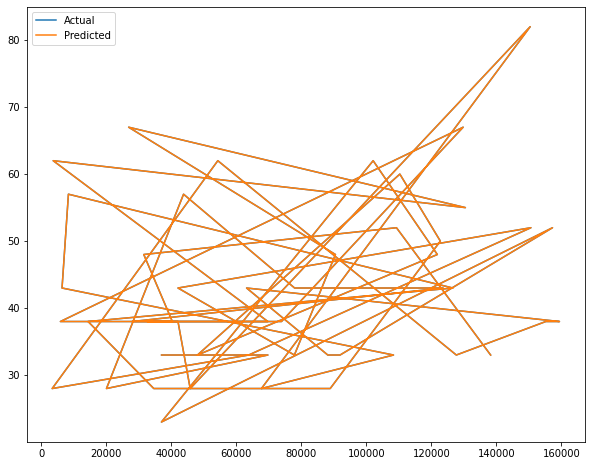

In [59]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

# Gradient Boosting Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_train, y_train)
xg_score = GBRModel.score(X_test,y_test)
acc.append(xg_score)
predicted = GBRModel.predict(X_test)
xg_score

0.9937266956114691

In [61]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.99
Mean Absolute Percentage Error: 0.02
Mean Absolute Error: 1
Root Mean Squared Error : 1


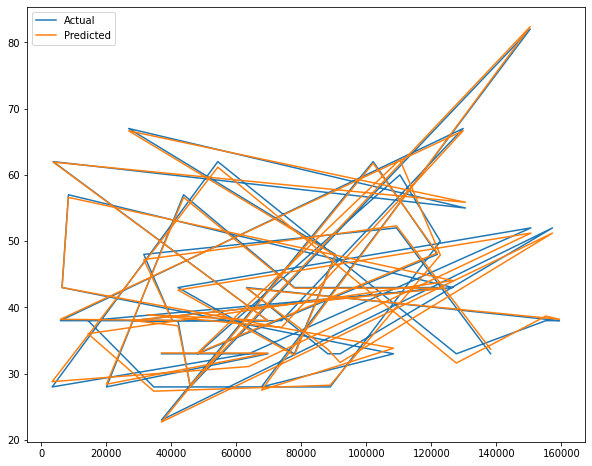

In [62]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

<a id="9"></a> <br>

# Evaluation for regression models

In [63]:

# import pandas as pd
import pandas as pd 
    
# List1 
lst = [R2,MAPE,MAE,RMSE,acc]
    
d = pd.DataFrame({"R2":R2,"MAPE":MAPE,"MAE":MAE,"RMSE":RMSE,"acc":acc},index=["Linear regression","Ridge regression","Lasso regression","Random Forest Regressor","Gradient Boosting Regressor"])

In [64]:
import plotly.express as px
fig = px.bar(data_frame=d, y=d.index, x=["R2","MAPE","MAE","RMSE","acc"], text_auto='0.2s',
            title="Regression models")
fig.update_traces(textfont_size=12, textangle=0,textposition="auto", cliponaxis=False)
fig.show()

### Based on the results, GB and RF are the best regression models for this challenge

<a id="10"></a> <br>
# Classification models
1. K Nearest Neighbours
2. Decision Tree
3. Naive Bayes
4. Random Forest Classifier
5. Logistic Regression 
6. Support Vector Machine

In [65]:
import numpy as np #Mengolah matrix
import pandas as pd #Read structured data
import matplotlib.pyplot as plt #Data plot visualization
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate
#ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


df_copy = pd.read_csv("../input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
encoders = {}
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df_copy[col] = label_encoder.fit_transform(df_copy[col])
            encoders[col] = label_encoder
df_copy["price 2"] = df_copy["price 2"] - 1

y = df_copy["price 2"]
X = df_copy.drop("price 2",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accurac=[]
precision=[]
recall=[]

# Cross-Validation and Hyperparameter Tuning (GridSearch)

### We will use K-Fold Cross validation--> Ensures that every observation from the original dataset has the chance of appearing in training and test set.

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

# K-Nearest Neighbour

In [67]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train[:1000], y_train[:1000])

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_test, y_test)
KNN_predict = KNN_model.predict(X_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9256360669607784
Test Score: 0.927738329052727


In [68]:
KNN_predict = KNN_model.predict(X_test)
accurac.append(accuracy_score(KNN_predict, y_test))
precision.append(precision_score(KNN_predict, y_test))
recall.append(recall_score(KNN_predict, y_test))


print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     67836
           1       0.96      0.89      0.92     64544

    accuracy                           0.93    132380
   macro avg       0.93      0.93      0.93    132380
weighted avg       0.93      0.93      0.93    132380



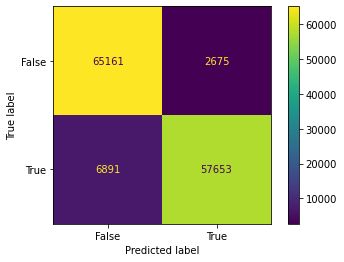

In [69]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicted = KNN_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train, y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=DecisionTreeClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [71]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [72]:
gs_DT.best_score_

1.0

In [73]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

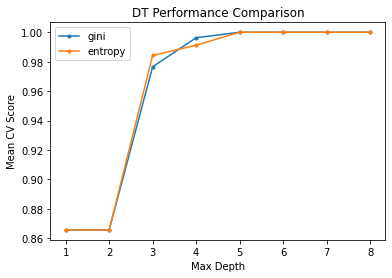

In [74]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()


predicted=gs_DT.predict(X_test)
accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

In [75]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67836
           1       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



# Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train)

predicted=gs_NB.predict(X_test)
accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [77]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     67836
           1       0.88      0.97      0.93     64544

    accuracy                           0.92    132380
   macro avg       0.93      0.93      0.92    132380
weighted avg       0.93      0.92      0.92    132380



# Random Forest Classifier

In [78]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,5,6,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [20,30]
}
# Create a based model
rf = RandomForestClassifier(random_state=12)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv_method , n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train);

Fitting 15 folds for each of 24 candidates, totalling 360 fits
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=30; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=30; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=30; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] EN

In [79]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 20}

In [80]:
best_grid = grid_search.best_estimator_
predicted=grid_search.predict(X_test)
print(accuracy_score(predicted, y_test))

accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

1.0


In [81]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67836
           1       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



# Logistic Regression

In [82]:
df_copy = pd.read_csv("../input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['page 2 (clothing model)']
for x in clm:
    df_copy[x]=le.fit_transform(df_copy[x])



y = df_copy["price 2"]
X = df_copy.drop("price 2",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
m1 = 'Logistic Regression'
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score( lr_predict,y_test)
print("confussion matrix")
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix


Accuracy of Logistic Regression: 99.82474618412874 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [84]:
accurac.append(accuracy_score(lr_predict, y_test))
precision.append(precision_score(lr_predict, y_test))
recall.append(recall_score(lr_predict, y_test))

In [85]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



# SVM

In [86]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)



svc_acc_score = accuracy_score(y_test, svc_predicted)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))



Accuracy of Support Vector Classifier: 99.99136680709994 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [87]:
print(classification_report(y_test, svc_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [88]:
accurac.append(accuracy_score(svc_predicted, y_test))
precision.append(precision_score(svc_predicted, y_test))
recall.append(recall_score(svc_predicted, y_test))

<a id="11"></a> <br>

# Evaluation for Classification models

In [89]:
# import pandas as pd
import pandas as pd 
    
# List1 
lst = [accurac,precision,recall]
    
d = pd.DataFrame({"accuracy":accurac,"preision":precision,"recall":recall},index=["K Nearest Neighbours",
"Decision Tree",
"Naive Bayes",
"Random Forest Classifier",
"Logistic Regression",
"Support Vector Machine"])

d

,accuracy,preision,recall
K Nearest Neighbours,0.927738,0.893236,0.955659
Decision Tree,1.000000,1.000000,1.000000
Naive Bayes,0.923931,0.974544,0.881856
Random Forest Classifier,1.000000,1.000000,1.000000
Logistic Regression,0.998247,0.996582,1.000000
Support Vector Machine,0.999914,0.999882,0.999949


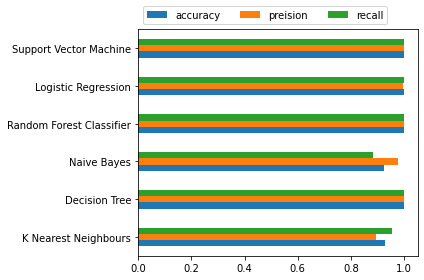

In [90]:
ax = d.plot.barh()
ax.legend(
    ncol=6, 
    bbox_to_anchor=(0, 1),
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

### Based on the results, KNN are the best classification model for this challenge and this is the classification report for this mode :


In [91]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train[:1000], y_train[:1000])

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_test, y_test)
KNN_predict = KNN_model.predict(X_test)

print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94     59384
           2       0.97      0.90      0.93     56448

    accuracy                           0.94    115832
   macro avg       0.94      0.93      0.94    115832
weighted avg       0.94      0.94      0.94    115832



### And confusion matrix is :

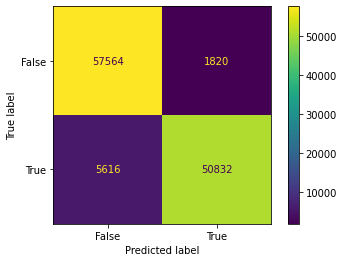

In [92]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicted = KNN_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()